<a href="https://colab.research.google.com/github/Anilkumarak14/movie-recommendation/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/nmr/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/nmr/tmdb_5000_credits.csv')

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

In [ ]:
movies.iloc[index]

budget                                                                  0
genres                                                    ['Documentary']
homepage                                                              NaN
id                                                                  25975
keywords                [{"id": 1523, "name": "obsession"}, {"id": 224...
original_language                                                      en
original_title                                          My Date with Drew
overview                Ever since the second grade when he first saw ...
popularity                                                       1.929883
production_companies    [{"name": "rusty bear entertainment", "id": 87...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2005-08-05
revenue                                                                 0
runtime                               

In [ ]:
movies = movies.merge(credits, left_on='id', right_on='movie_id', how='left')
movies = movies[['id', 'original_title', 'genres', 'vote_average']]

In [ ]:
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

In [ ]:
movies.columns

Index(['id', 'original_title', 'genres', 'vote_average'], dtype='object')

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

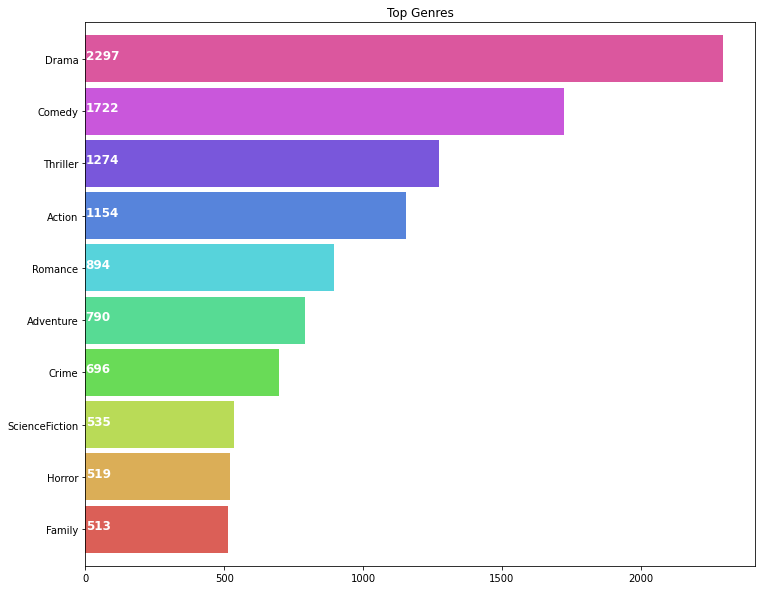

In [ ]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [ ]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]

    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [ ]:
def binary(genre_list):
    binaryList = []

    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [ ]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [ ]:
from scipy import spatial
def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]

    genresA = a['genres_bin']
    genresB = b['genres_bin']

    genreDistance = spatial.distance.cosine(genresA, genresB)
    return genreDistance

In [ ]:
Similarity(3,160)

0.7958758547680684

In [ ]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
vote_average                                                    7.6
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Fantasy, Action, Adventure, Animation, Comedy...
vote_average                                                    7.6
genres_bin        [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, ...
Name: 160, dtype: object


In [ ]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','genres_bin','new_id']]
movies.head()

,original_title,genres,genres_bin,new_id
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,Spectre,"[Action, Adventure, Crime]","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,John Carter,"[Action, Adventure, ScienceFiction]","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


In [ ]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []

        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))

        distances.sort(key=operator.itemgetter(1))
        neighbors = []

        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 20
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        #avgRating = avgRating+movies.iloc[neighbor[0]][2]
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ',''))

    print('\n')
    avgRating = avgRating/K
    #print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    #print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [ ]:
predict_score('Avatar')

Selected Movie:  Avatar

Recommended Movies: 

Superman Returns | Genres: 'Adventure','Fantasy','Action','ScienceFiction'
Man of Steel | Genres: 'Action','Adventure','Fantasy','ScienceFiction'
X-Men: Days of Future Past | Genres: 'Action','Adventure','Fantasy','ScienceFiction'
Jupiter Ascending | Genres: 'ScienceFiction','Fantasy','Action','Adventure'
The Wolverine | Genres: 'Action','ScienceFiction','Adventure','Fantasy'
Superman | Genres: 'Action','Adventure','Fantasy','ScienceFiction'
Superman II | Genres: 'Action','Adventure','Fantasy','ScienceFiction'
Beastmaster 2: Through the Portal of Time | Genres: 'Action','Adventure','Fantasy','ScienceFiction'
Suicide Squad | Genres: 'Action','Adventure','Crime','Fantasy','ScienceFiction'
Teenage Mutant Ninja Turtles | Genres: 'ScienceFiction','Action','Adventure','Fantasy','Comedy'
The Fifth Element | Genres: 'Adventure','Fantasy','Action','Thriller','ScienceFiction'
Mystery Men | Genres: 'Adventure','Fantasy','Action','Comedy','ScienceFict

In [ ]:
predict_score("Pirates of the Caribbean: At World's End")

Selected Movie:  Pirates of the Caribbean: At World's End

Recommended Movies: 

Spider-Man 3 | Genres: 'Fantasy','Action','Adventure'
Batman v Superman: Dawn of Justice | Genres: 'Action','Adventure','Fantasy'
Pirates of the Caribbean: Dead Man's Chest | Genres: 'Adventure','Fantasy','Action'
Pirates of the Caribbean: On Stranger Tides | Genres: 'Adventure','Action','Fantasy'
The Hobbit: The Battle of the Five Armies | Genres: 'Action','Adventure','Fantasy'
The Amazing Spider-Man | Genres: 'Action','Adventure','Fantasy'
Spider-Man 2 | Genres: 'Action','Adventure','Fantasy'
The Amazing Spider-Man 2 | Genres: 'Action','Adventure','Fantasy'
The Mummy: Tomb of the Dragon Emperor | Genres: 'Adventure','Action','Fantasy'
The Hobbit: An Unexpected Journey | Genres: 'Adventure','Fantasy','Action'
Warcraft | Genres: 'Action','Adventure','Fantasy'
Thor: The Dark World | Genres: 'Action','Adventure','Fantasy'
Thor | Genres: 'Adventure','Fantasy','Action'
Pirates of the Caribbean: The Curse of th